In [1]:
#### MODULES ####

import pandas as pd           #for working and manipulating dataset
import matplotlib.pyplot as plt           #for plotting graphs and visual representation of data
import seaborn as sns           #for plotting graphs and visual representation of data
import numpy as np      #for numerical calculations on the data
from scipy.stats import norm      #'norm' function from 'scipy.stats' module performs normalization on data
from sklearn.preprocessing import StandardScaler      #'StandardScaler' function from 'sklearn.preprocessing' module helps to standardize data
from scipy import stats      #'stats' module from 'scipy' library gives statistical insights on data

# **Exercise 1: Exploratory Data Analysis**

## **Step 1: Data Collection**

In [2]:
#### Uploading Dataset ####

from google.colab import files
upload1 = files.upload()

Saving 2-auto_Price.xlsx to 2-auto_Price.xlsx


In [3]:
#### Reading Data ####

import io
data = pd.read_excel(io.BytesIO(upload1.get('2-auto_Price.xlsx')))        #Dataset stored in Pandas dataframe
df = data
df.to_csv()
df

name  seller  price  \
0      Ford_Transit_Connect____Hoch_/_Lang___FESTPREI...  dealer   4000   
1                                  Suche_Golf_4_mit_Tuev  privat   1300   
2                                 BMW_328i_Sport_Edition  dealer   1950   
3                                             Ford_Focus  privat    990   
4                    Mercedes_Benz_E_320_CDI__Avantgarde  privat   7900   
...                                                  ...     ...    ...   
11995                             MINI_John_Cooper_Works  dealer  11500   
11996                                 Ich_verkaufe_bmw_3  dealer   4700   
11997  Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...  dealer  11900   
11998                           Chevrolet_Camaro_5.7_Z28  privat   2500   
11999                      VW_Golf_6_2.0_TDI_Comfortline  privat  10250   

        abtest vehicleType  yearOfRegistration    gearbox  powerPS     model  \
0      control         bus                2008    manuell       90   transit   
1      control         NaN                1995        NaN        0      golf   
2         test       coupe                1997  automatik      193       3er   
3      control   limousine                2000    manuell      115     focus   
4      control   limousine                2004  automatik      204  e_klasse   
...        ...         ...                 ...        ...      ...       ...   
11995     test       coupe                2005    manuell      211    cooper   
11996  control   limousine                2004    manuell      150       3er   
11997  control      andere                2002    manuell      129       NaN   
11998  control       coupe                2001  automatik      288    andere   
11999     test         NaN                2009    manuell      110      golf   

       kilometer  monthOfRegistration fuelType          brand  \
0         150000                    3   diesel           ford   
1         125000                    0   benzin     volkswagen   
2         150000                    5   benzin            bmw   
3         150000                    3   benzin           ford   
4         150000                    1   diesel  mercedes_benz   
...          ...                  ...      ...            ...   
11995     125000                    9   benzin           mini   
11996     150000                    0   diesel            bmw   
11997     150000                   11   diesel     volkswagen   
11998     150000                   11   benzin      chevrolet   
11999     100000                    5   diesel     volkswagen   

      notRepairedDamage  nrOfPictures  postalCode  
0                  nein             0       53757  
1                   NaN             0       45309  
2                  nein             0       86167  
3                    ja             0       44867  
4                  nein             0       70806  
...                 ...           ...         ...  
11995              nein             0       79189  
11996               NaN             0       74357  
11997              nein             0       10551  
11998              nein             0       63263  
11999               NaN             0       75181  

[12000 rows x 16 columns]

## **Step 2: Data Cleaning**

In [4]:
#### Checking for UNIQUE VALUES in each column ####

for i in df.columns:
  print("Number of unique values in {} \n The unique values are: \n{}".format(i,df[i].unique()))
  print("----------------------------------------------\n")

Number of unique values in name 
 The unique values are: 
['Ford_Transit_Connect____Hoch_/_Lang___FESTPREIS_!!!!!!!!'
 'Suche_Golf_4_mit_Tuev' 'BMW_328i_Sport_Edition' ...
 'Abschleppwagen_Vw_LT_195.000_gruene_Plakette_TÜV_8/2017'
 'Chevrolet_Camaro_5.7_Z28' 'VW_Golf_6_2.0_TDI_Comfortline']
----------------------------------------------

Number of unique values in seller 
 The unique values are: 
['dealer' 'privat']
----------------------------------------------

Number of unique values in price 
 The unique values are: 
[ 4000  1300  1950 ... 26299  9690 18390]
----------------------------------------------

Number of unique values in abtest 
 The unique values are: 
['control' 'test']
----------------------------------------------

Number of unique values in vehicleType 
 The unique values are: 
['bus' nan 'coupe' 'limousine' 'kleinwagen' 'andere' 'suv' 'kombi'
 'cabrio']
----------------------------------------------

Number of unique values in yearOfRegistration 
 The unique values

**Observation:** Deleting column *'nrOfPictures'*	
- Column **'nrOfPictures'** should be deleted since all the cell values are zeroes.

In [5]:
#### Deleting column 'nrOfPictures' ####

df.drop('nrOfPictures', axis=1, inplace=True)

In [6]:
#### Deleting Rows with monthOfRegistration==0 ####

df.drop(index=df[df['monthOfRegistration']<1].index, inplace=True)

In [7]:
#### Deleting 2 Rows with very high prices ####

df.drop(index=df[df['price']>164990].index, inplace=True)

In [8]:
#### Deleting Rows with year==5000 ####

df.drop(index=df[df['yearOfRegistration']>2019].index, inplace=True)

In [9]:
#### Deleting  'postalCode' column ####

df.drop('postalCode', axis=1, inplace=True)

In [10]:
####Scaling PRICE to 1=1000 ####

df['price'] = df['price']/1000
df

name  seller   price  \
0      Ford_Transit_Connect____Hoch_/_Lang___FESTPREI...  dealer   4.000   
2                                 BMW_328i_Sport_Edition  dealer   1.950   
3                                             Ford_Focus  privat   0.990   
4                    Mercedes_Benz_E_320_CDI__Avantgarde  privat   7.900   
5                   Opel_Corsa_1.2_16V__ecoFLEX__Edition  privat   5.999   
...                                                  ...     ...     ...   
11994      Opel_Vectra_2.0_Turbo_Sport/GTS_LPG_Gasanlage  privat   4.950   
11995                             MINI_John_Cooper_Works  dealer  11.500   
11997  Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...  dealer  11.900   
11998                           Chevrolet_Camaro_5.7_Z28  privat   2.500   
11999                      VW_Golf_6_2.0_TDI_Comfortline  privat  10.250   

        abtest vehicleType  yearOfRegistration    gearbox  powerPS     model  \
0      control         bus                2008    manuell       90   transit   
2         test       coupe                1997  automatik      193       3er   
3      control   limousine                2000    manuell      115     focus   
4      control   limousine                2004  automatik      204  e_klasse   
5         test  kleinwagen                2013    manuell       69     corsa   
...        ...         ...                 ...        ...      ...       ...   
11994     test   limousine                2007    manuell      175    vectra   
11995     test       coupe                2005    manuell      211    cooper   
11997  control      andere                2002    manuell      129       NaN   
11998  control       coupe                2001  automatik      288    andere   
11999     test         NaN                2009    manuell      110      golf   

       kilometer  monthOfRegistration fuelType          brand  \
0         150000                    3   diesel           ford   
2         150000                    5   benzin            bmw   
3         150000                    3   benzin           ford   
4         150000                    1   diesel  mercedes_benz   
5          70000                    2   benzin           opel   
...          ...                  ...      ...            ...   
11994     150000                   11      lpg           opel   
11995     125000                    9   benzin           mini   
11997     150000                   11   diesel     volkswagen   
11998     150000                   11   benzin      chevrolet   
11999     100000                    5   diesel     volkswagen   

      notRepairedDamage  
0                  nein  
2                  nein  
3                    ja  
4                  nein  
5                  nein  
...                 ...  
11994                ja  
11995              nein  
11997              nein  
11998              nein  
11999               NaN  

[10798 rows x 14 columns]

In [11]:
#### Gathering Dataset information ####
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10798 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 10798 non-null  object 
 1   seller               10798 non-null  object 
 2   price                10798 non-null  float64
 3   abtest               10798 non-null  object 
 4   vehicleType          10080 non-null  object 
 5   yearOfRegistration   10798 non-null  int64  
 6   gearbox              10452 non-null  object 
 7   powerPS              10798 non-null  int64  
 8   model                10346 non-null  object 
 9   kilometer            10798 non-null  int64  
 10  monthOfRegistration  10798 non-null  int64  
 11  fuelType             10158 non-null  object 
 12  brand                10798 non-null  object 
 13  notRepairedDamage    9181 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.2+ MB


In [12]:
#### Finding missing Data ####

total = df.isnull().sum().sort_values(ascending=False)        #Finding sum of missing values and sort in descending order
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)                #Percentage of missing values in the Dataset
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])                 #Converting missing data into a new Pandas Dataframe
missing_data.head(20)

Total   Percent
notRepairedDamage     1617  0.149750
vehicleType            718  0.066494
fuelType               640  0.059270
model                  452  0.041860
gearbox                346  0.032043
name                     0  0.000000
seller                   0  0.000000
price                    0  0.000000
abtest                   0  0.000000
yearOfRegistration       0  0.000000
powerPS                  0  0.000000
kilometer                0  0.000000
monthOfRegistration      0  0.000000
brand                    0  0.000000

**Observation:** Missing Data

- Columns **notRepairedDamage, vehicleType, fuelType, model, gearbox** has missing values.
- Column **notRepairedDamage** can be deleted since missing values are greater than 15%, but it is an important variable as it can affect the price of the automobile, therefore cannot be completely deleted.
- Rest of the columns with null values also contain important information that affects the price of the automobile.
- Since columns with null values are important and cannot be deleted, we have to fill/replace null values within the columns.
- All the five columns with missing values are not numerical, it is difficult to replace the null values with MEAN. Therefore, we will use a method by replacing the null values with the value of highest frequency of the respective columns.

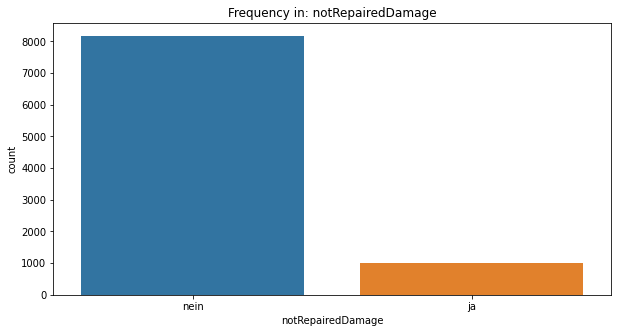

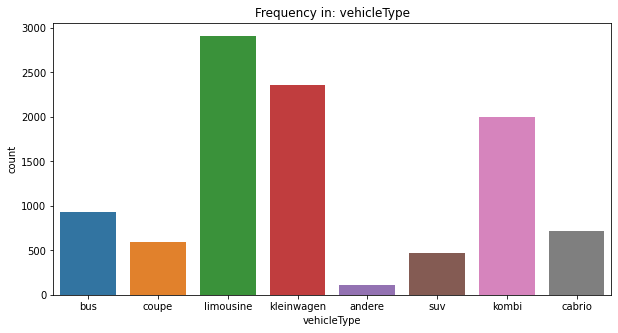

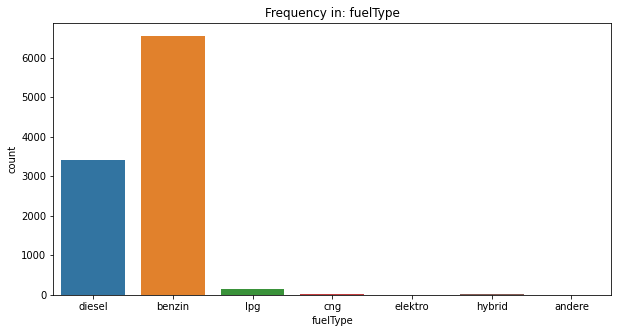

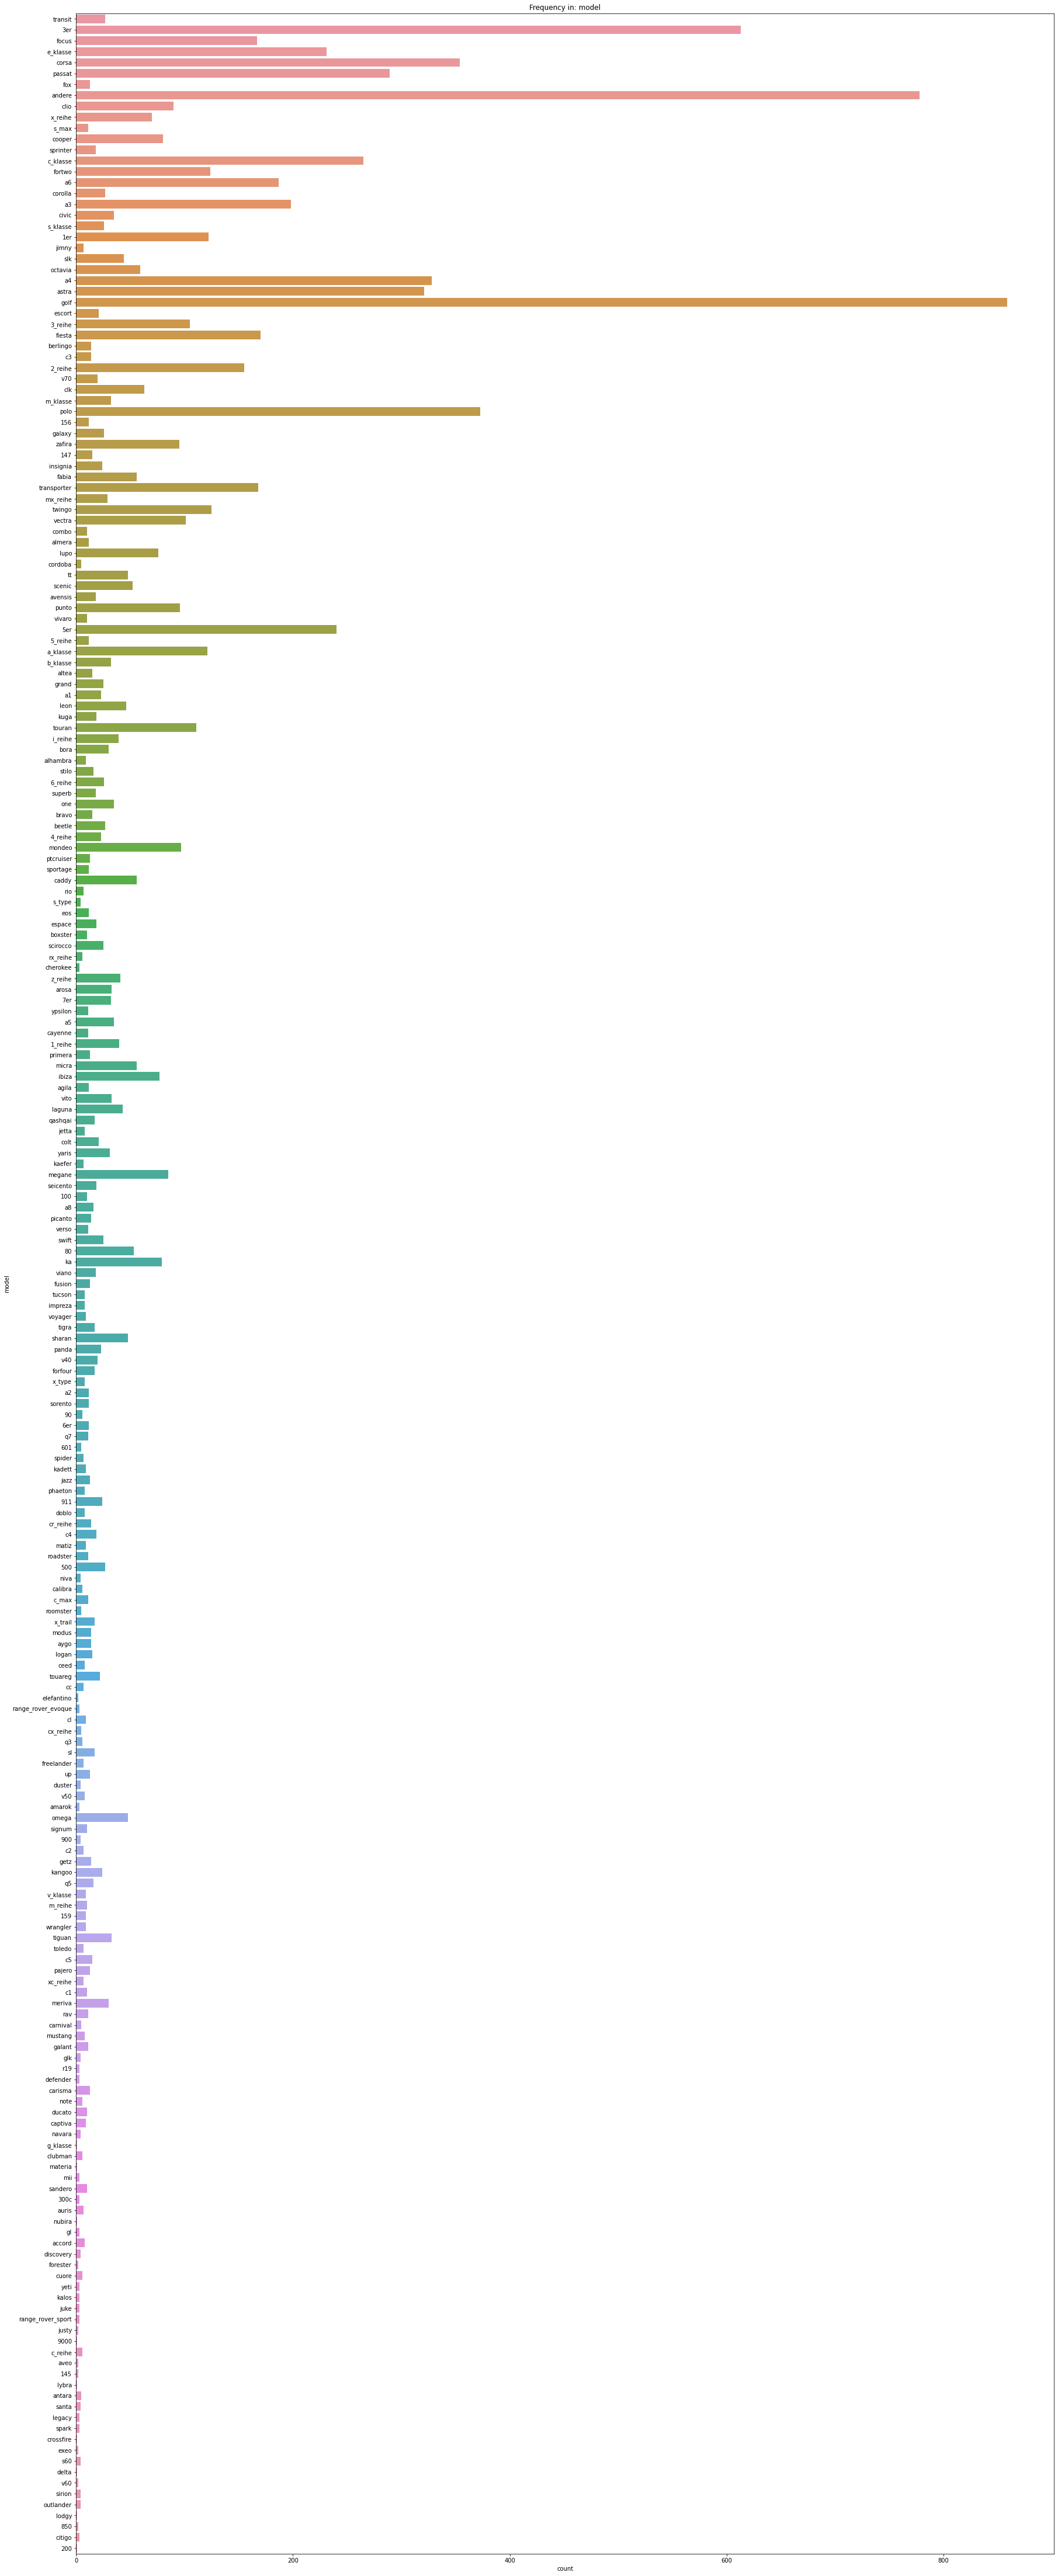

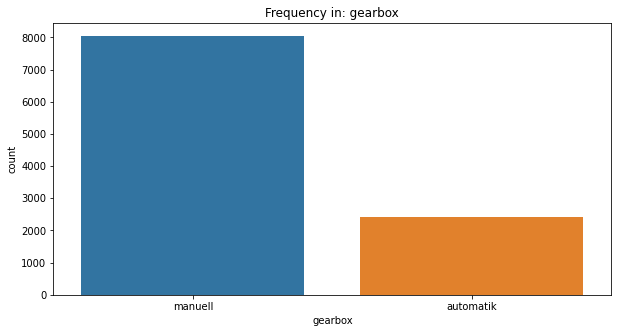

In [13]:
#### Finding FREQUENCY of values of each column with null values ####

#Missing value frequency of column: notRepairedDamage
plt.figure(figsize=(10,5))
sns.countplot(x="notRepairedDamage", data=df)
plt.title('Frequency in: notRepairedDamage')
plt.show()

#Missing value frequency of column: vehicleType
plt.figure(figsize=(10,5))
sns.countplot(x="vehicleType", data=df)
plt.title('Frequency in: vehicleType')
plt.show()

#Missing value frequency of column: fuelType
plt.figure(figsize=(10,5))
sns.countplot(x="fuelType", data=df)
plt.title('Frequency in: fuelType')
plt.show()

#Missing value frequency of column: model
plt.figure(figsize=(30,80))
sns.countplot(y="model", data=df)
plt.title('Frequency in: model')
plt.show()

#Missing value frequency of column: gearbox
plt.figure(figsize=(10,5))
sns.countplot(x="gearbox", data=df)
plt.title('Frequency in: gearbox')
plt.show()

In [14]:
#### Filling null values with highest frequency value ####

df.columns
filled_df = df.fillna({'vehicleType':"limousine", 'gearbox':"manuell", 'model':"golf", 'fuelType':"benzin", 'notRepairedDamage':"nein"})

In [15]:
#### Checking if null values still exist ####

total_check = filled_df.isnull().sum().sort_values(ascending=False)        #Finding sum of missing values_check and sort in descending order
percent_check = (filled_df.isnull().sum()/filled_df.isnull().count()).sort_values(ascending=False)                #Percentage of missing values_check in the Dataset
missing_data_check = pd.concat([total_check, percent_check], axis=1, keys=['Total_check', 'Percent_check'])                 #Converting missing data_check into a new Pandas Dataframe
missing_data_check.head(20)

Total_check  Percent_check
name                           0            0.0
seller                         0            0.0
price                          0            0.0
abtest                         0            0.0
vehicleType                    0            0.0
yearOfRegistration             0            0.0
gearbox                        0            0.0
powerPS                        0            0.0
model                          0            0.0
kilometer                      0            0.0
monthOfRegistration            0            0.0
fuelType                       0            0.0
brand                          0            0.0
notRepairedDamage              0            0.0

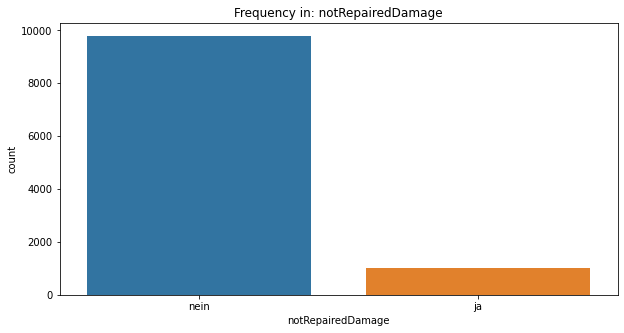

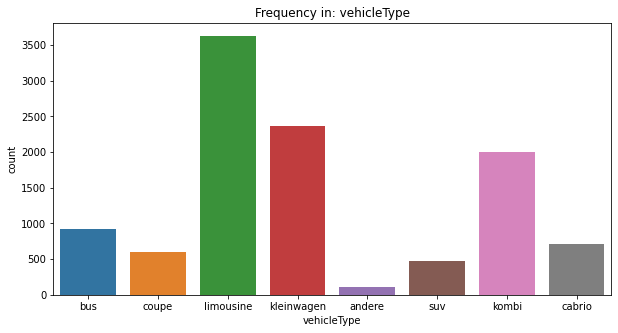

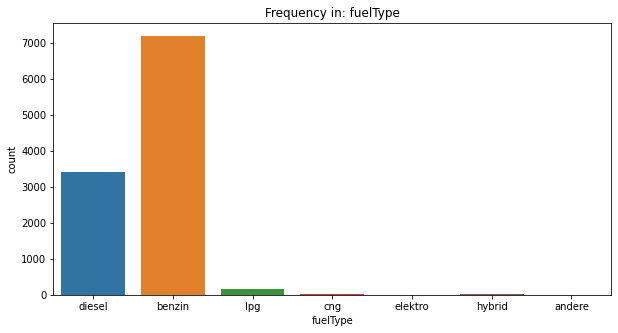

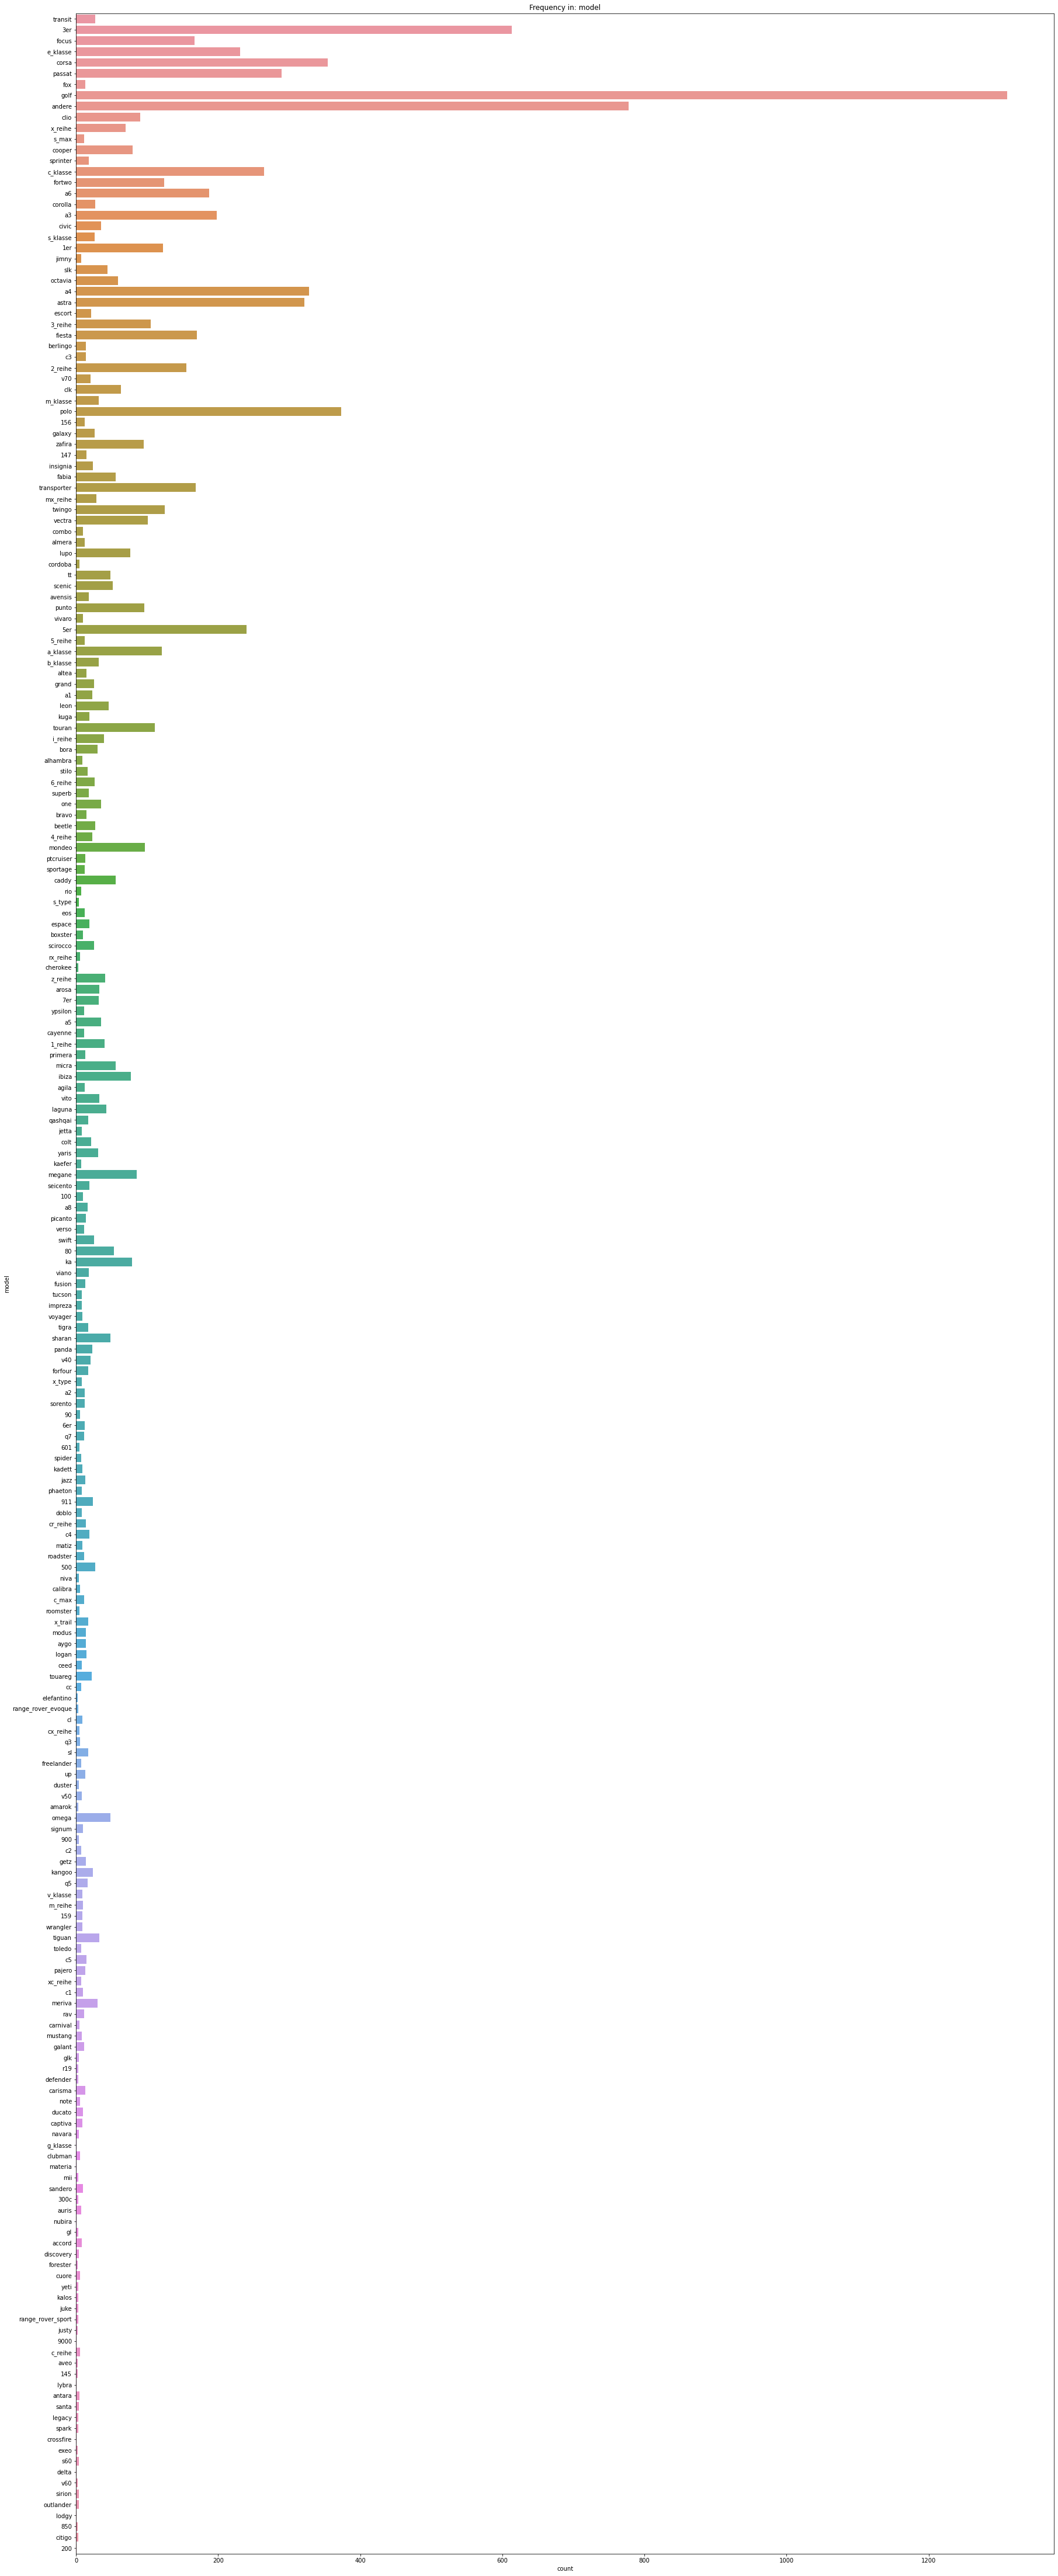

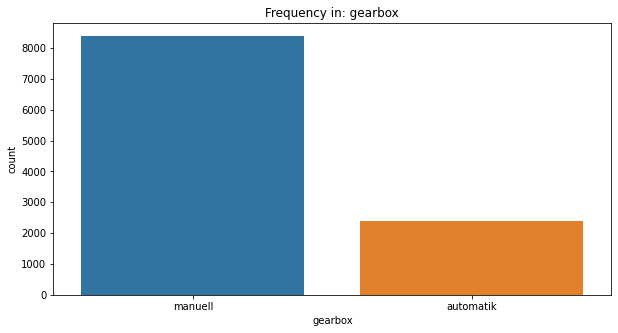

In [16]:
#### Finding FREQUENCY of values of each column with null values after filling highest FREQUENCY values ####

#Missing value frequency of column: notRepairedDamage
plt.figure(figsize=(10,5))
sns.countplot(x="notRepairedDamage", data=filled_df)
plt.title('Frequency in: notRepairedDamage')
plt.show()

#Missing value frequency of column: vehicleType
plt.figure(figsize=(10,5))
sns.countplot(x="vehicleType", data=filled_df)
plt.title('Frequency in: vehicleType')
plt.show()

#Missing value frequency of column: fuelType
plt.figure(figsize=(10,5))
sns.countplot(x="fuelType", data=filled_df)
plt.title('Frequency in: fuelType')
plt.show()

#Missing value frequency of column: model
plt.figure(figsize=(30,80))
sns.countplot(y="model", data=filled_df)
plt.title('Frequency in: model')
plt.show()

#Missing value frequency of column: gearbox
plt.figure(figsize=(10,5))
sns.countplot(x="gearbox", data=filled_df)
plt.title('Frequency in: gearbox')
plt.show()

In [17]:
#### Viewing FILLED Dataset ####

filled_df

name  seller   price  \
0      Ford_Transit_Connect____Hoch_/_Lang___FESTPREI...  dealer   4.000   
2                                 BMW_328i_Sport_Edition  dealer   1.950   
3                                             Ford_Focus  privat   0.990   
4                    Mercedes_Benz_E_320_CDI__Avantgarde  privat   7.900   
5                   Opel_Corsa_1.2_16V__ecoFLEX__Edition  privat   5.999   
...                                                  ...     ...     ...   
11994      Opel_Vectra_2.0_Turbo_Sport/GTS_LPG_Gasanlage  privat   4.950   
11995                             MINI_John_Cooper_Works  dealer  11.500   
11997  Abschleppwagen_Vw_LT_195.000_gruene_Plakette_T...  dealer  11.900   
11998                           Chevrolet_Camaro_5.7_Z28  privat   2.500   
11999                      VW_Golf_6_2.0_TDI_Comfortline  privat  10.250   

        abtest vehicleType  yearOfRegistration    gearbox  powerPS     model  \
0      control         bus                2008    manuell       90   transit   
2         test       coupe                1997  automatik      193       3er   
3      control   limousine                2000    manuell      115     focus   
4      control   limousine                2004  automatik      204  e_klasse   
5         test  kleinwagen                2013    manuell       69     corsa   
...        ...         ...                 ...        ...      ...       ...   
11994     test   limousine                2007    manuell      175    vectra   
11995     test       coupe                2005    manuell      211    cooper   
11997  control      andere                2002    manuell      129      golf   
11998  control       coupe                2001  automatik      288    andere   
11999     test   limousine                2009    manuell      110      golf   

       kilometer  monthOfRegistration fuelType          brand  \
0         150000                    3   diesel           ford   
2         150000                    5   benzin            bmw   
3         150000                    3   benzin           ford   
4         150000                    1   diesel  mercedes_benz   
5          70000                    2   benzin           opel   
...          ...                  ...      ...            ...   
11994     150000                   11      lpg           opel   
11995     125000                    9   benzin           mini   
11997     150000                   11   diesel     volkswagen   
11998     150000                   11   benzin      chevrolet   
11999     100000                    5   diesel     volkswagen   

      notRepairedDamage  
0                  nein  
2                  nein  
3                    ja  
4                  nein  
5                  nein  
...                 ...  
11994                ja  
11995              nein  
11997              nein  
11998              nein  
11999              nein  

[10798 rows x 14 columns]

In [18]:
#### Acquiring STATISTICAL SUMMARY ####

filled_df['price'].describe().astype(int)         # Target Variable

count    10798
mean         6
std          8
min          0
25%          1
50%          3
75%          7
max        164
Name: price, dtype: int64

**Observation:** STATISTICAL SUMMARY

- **count:** 12000   **--->** Number of Data Entries
-**mean:** 14969     **--->** On an average, an automobile costs around 14,969 €
-**std:** 909386     **--->** It tells by how much the data differs from the MEAN
-**min:** 0          **--->** MINIMUM price an automobile costs is around 0 €
-**25%:** 1199       **--->** 25% of automobiles cost around 1,199 €
-**50%:** 3000       **--->** 50% of automobiles cost around 3,000 €
-**75%:** 7499       **--->** 75% of automobiles cost around 7,499 € or less
-**max:** 99000000   **--->** MAXIMUM price an automobile costs is around 99,000,000 €

## **Step 3: Multivariate Analysis**

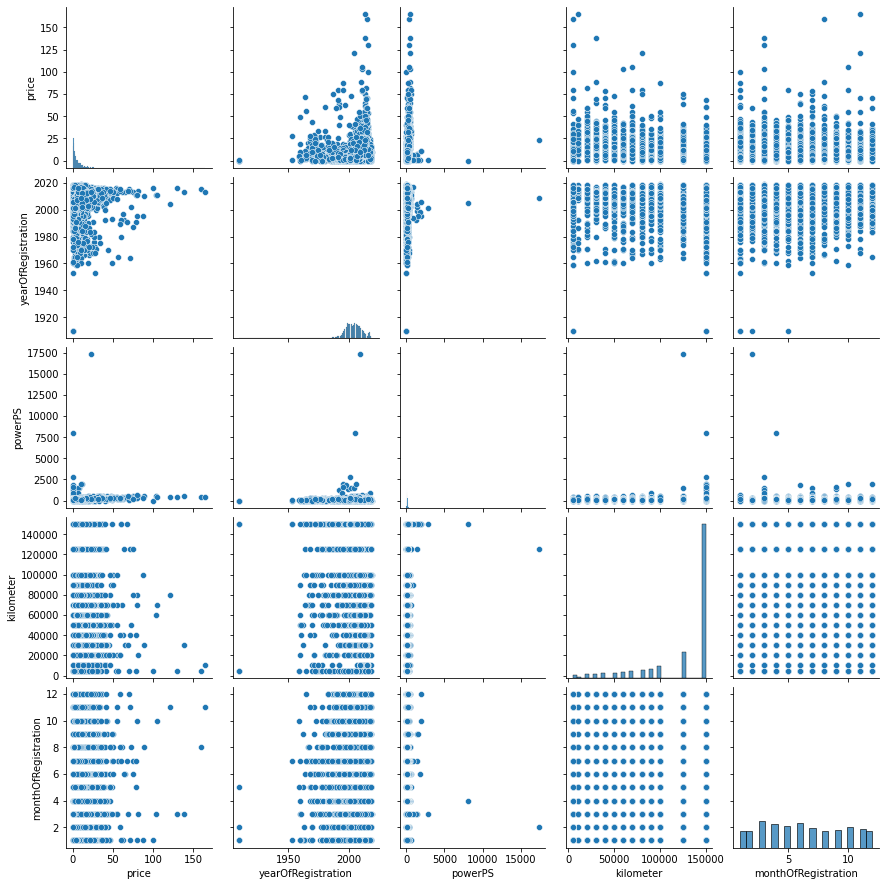

In [19]:
sns.pairplot(filled_df)

###***3.1:  Correlation w.r.t. Numerical Variables***

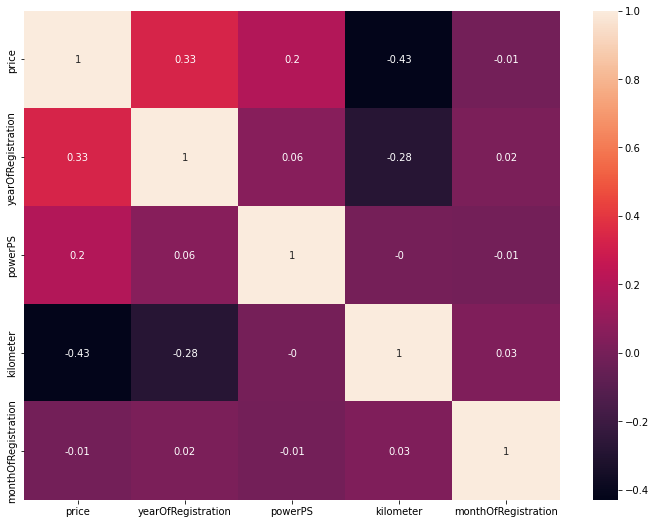

In [20]:
#### Correlation Matrix ####

corr_mat = filled_df.corr().round(2)
corr_mat

plt.figure(figsize=(12,9))
plot = sns.heatmap(corr_mat, annot=True);

**Observation:** Correlation Matrix
- The highest correlation value in the above correlation matrix is **0.2** which indicates not much correlation exists between the variables (numerical).
- Most of the the correlation values exist as **+ve Correlation** (values>0); only a few **-ve Correlation** values exist (correlation values < 0).
- These **weaker correlation** values indicate all these variables (numerical columns) does not affect each other to a greater degree or does not affect at all.
- If we consider the highest correlation value **0.2**, only the variable pair **powerPS - yearOfRegistration** affect each other to a very small degree which can be hardly considered thus, indicating a **weaker correlation**.

In [21]:
filled_df.corr()["price"]

price                  1.000000
yearOfRegistration     0.334057
powerPS                0.198337
kilometer             -0.428837
monthOfRegistration   -0.011619
Name: price, dtype: float64

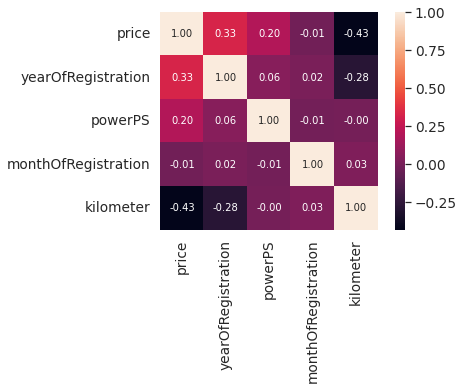

In [22]:
#### PRICE Correlation Matrix ####

k = 6       # Number of variables for heatmap
cols = corr_mat.nlargest(k,'price')['price'].index
cm = np.corrcoef(filled_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Observation:** PRICE Correlation (Numerical)
- **PRICE** correlation with respect to the numerical variables does not have much to be considered.
- Therefore, we have to consider performing the categorical analysis (on categorical variables) with respect to the target variable **price**.

###***3.2:  Categorical Analysis***

In [23]:
#### Categorical Variables and PRICE ####

Seller = filled_df['seller']
ABtest = filled_df['abtest']
VehicleType = filled_df['vehicleType']
GearBox = filled_df['gearbox']
FuelType = filled_df['fuelType']
NOTRepairedDamage = filled_df['notRepairedDamage']
Price =filled_df['price']

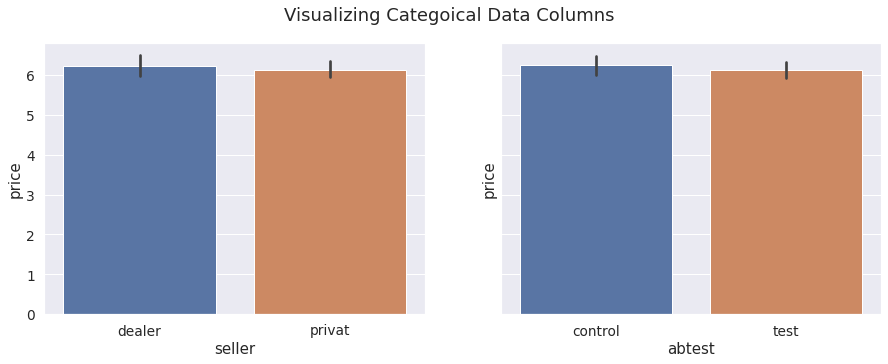

In [24]:
#### Visualizing Categorical Data Columns ####

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing Categoical Data Columns')
sns.barplot(x=Seller, y=Price, ax=axes[0])
sns.barplot(x=ABtest, y=Price, ax=axes[1])

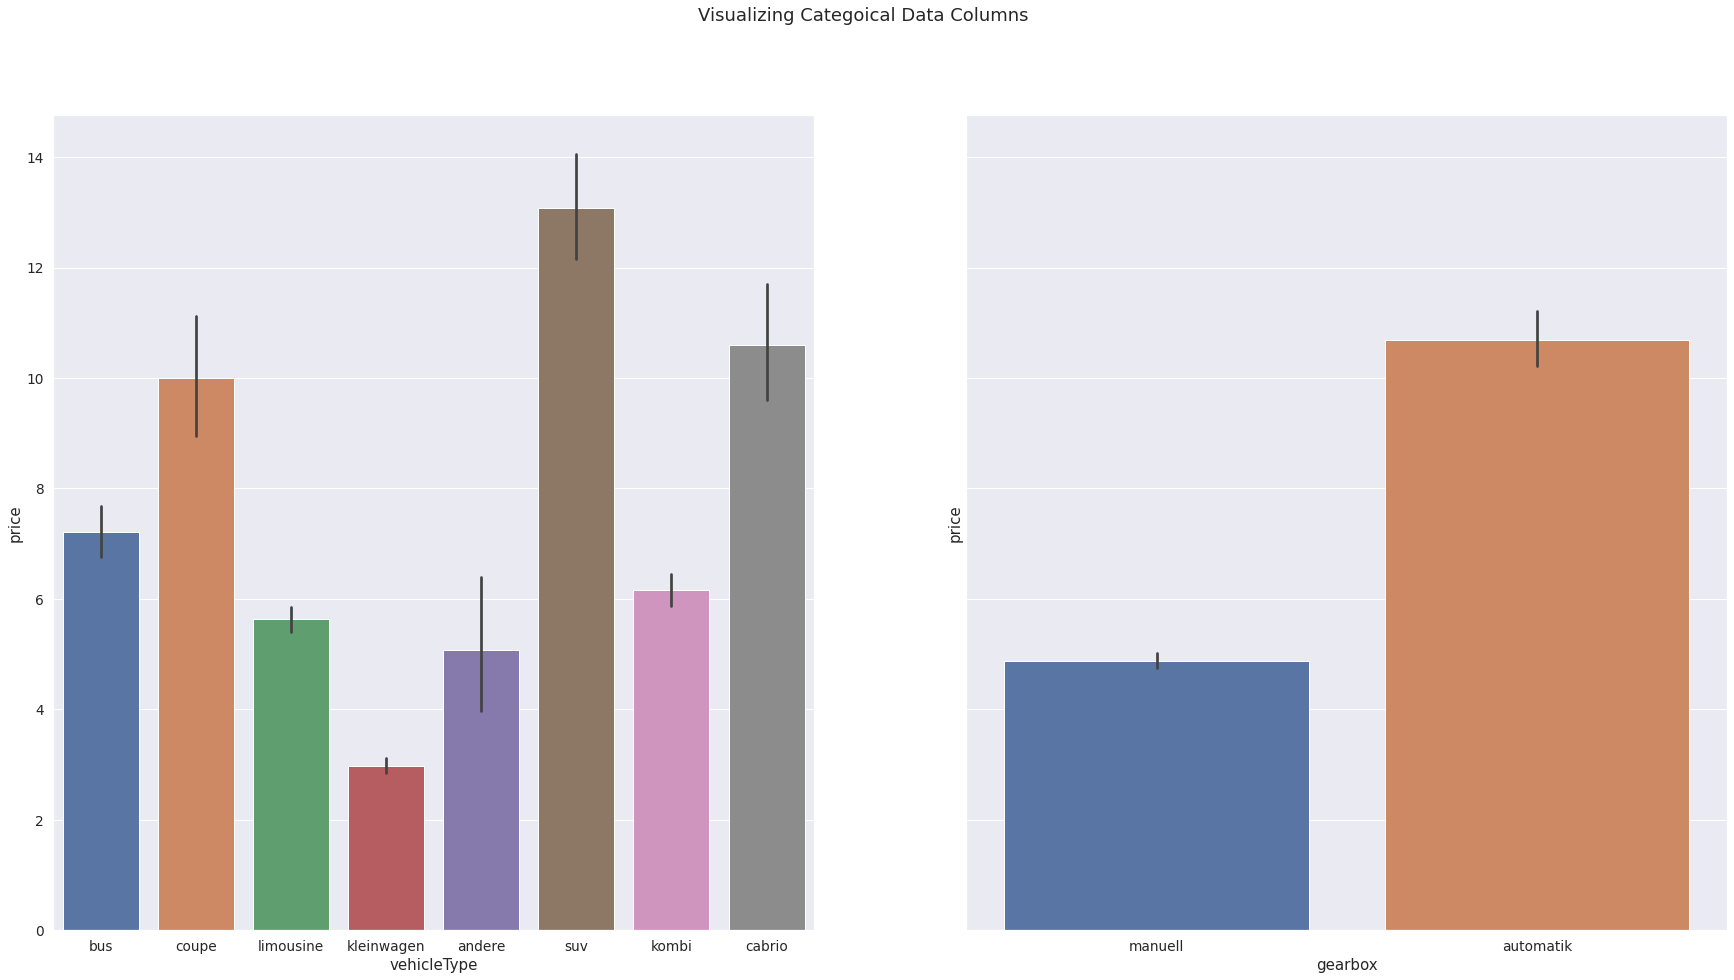

In [25]:
#### Visualizing Categorical Data Columns ####

fig, axes = plt.subplots(1,2, figsize=(30,15), sharey=True)
fig.suptitle('Visualizing Categoical Data Columns')
sns.barplot(x=VehicleType, y=Price, ax=axes[0])
sns.barplot(x=GearBox, y=Price, ax=axes[1])

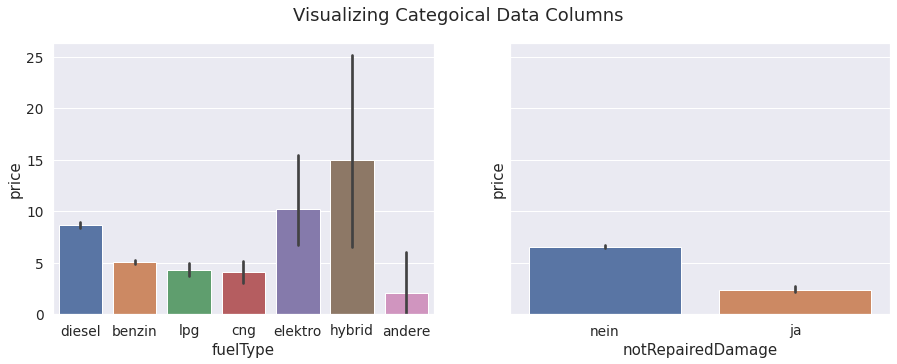

In [26]:
#### Visualizing Categorical Data Columns ####

fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing Categoical Data Columns')
sns.barplot(x=FuelType, y=Price, ax=axes[0])
sns.barplot(x=NOTRepairedDamage, y=Price, ax=axes[1])

###***3.3: Encoding Categorical Data***

In [27]:
#### Encoding SELLER Column ####
filled_df.replace({'seller':{'dealer':0,'privat':1}}, inplace=True)

#### Encoding ABTEST Column ####
filled_df.replace({'abtest':{'control':0,'test':1}}, inplace=True)

#### Encoding VehicleType Column ####
filled_df.replace({'vehicleType':{'bus':0,'limousine':1,'coupe':2,'kleinwagen':3,'andere':4,'suv':5,'kombi':6,'cabrio':7}}, inplace=True)

#### Encoding GearBox Column ####
filled_df.replace({'gearbox':{'manuell':0,'automatik':1}}, inplace=True)

#### Encoding FuelType Column ####
filled_df.replace({'fuelType':{'diesel':0,'benzin':1,'lpg':2,'cng':3,'elektro':4,'hybrid':5,'andere':6}}, inplace=True)

#### Encoding NotRepairedDamage Column ####
filled_df.replace({'notRepairedDamage':{'nein':0,'ja':1}}, inplace=True)

###***3.4: Correlation Matrix including Encoded Categorical Variables***

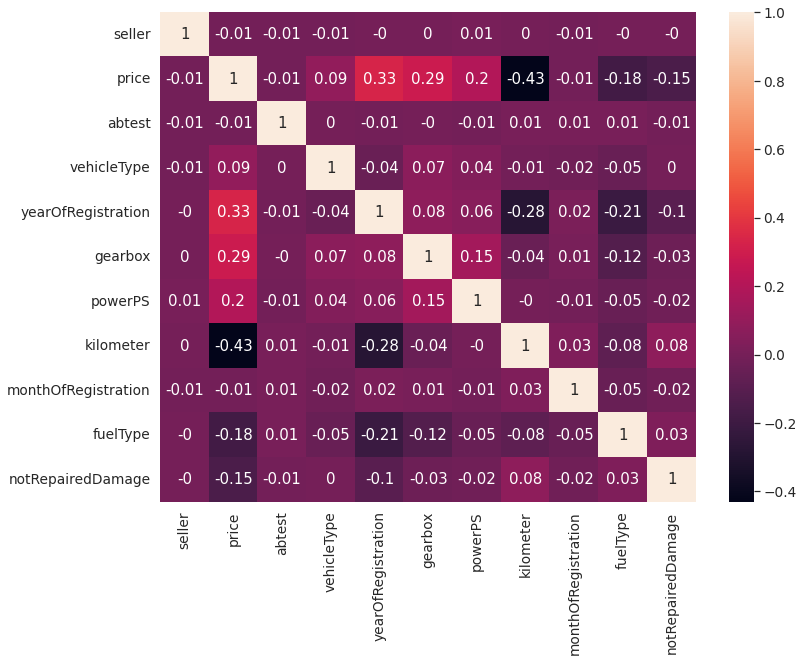

In [28]:
corr_mat = filled_df.corr().round(2)
corr_mat

plt.figure(figsize=(12,9))
plot = sns.heatmap(corr_mat, annot=True);

#**Exercise 2: Building a Model**

In [29]:
#### Viewing Dataset with ENCODED CATEGORICAL DATA ####
filled_df.head()

name  seller  price  abtest  \
0  Ford_Transit_Connect____Hoch_/_Lang___FESTPREI...       0  4.000       0   
2                             BMW_328i_Sport_Edition       0  1.950       1   
3                                         Ford_Focus       1  0.990       0   
4                Mercedes_Benz_E_320_CDI__Avantgarde       1  7.900       0   
5               Opel_Corsa_1.2_16V__ecoFLEX__Edition       1  5.999       1   

   vehicleType  yearOfRegistration  gearbox  powerPS     model  kilometer  \
0            0                2008        0       90   transit     150000   
2            2                1997        1      193       3er     150000   
3            1                2000        0      115     focus     150000   
4            1                2004        1      204  e_klasse     150000   
5            3                2013        0       69     corsa      70000   

   monthOfRegistration  fuelType          brand  notRepairedDamage  
0                    3         0           ford                  0  
2                    5         1            bmw                  0  
3                    3         1           ford                  1  
4                    1         0  mercedes_benz                  0  
5                    2         1           opel                  0

##**Step 1:   Splitting Dataset**

###***1.1: Data separation as X and y***

In [30]:
#### Data separation as y ####

Y = filled_df['price']        # y is considered as the output variable that is subjected to prediction
Y

0         4.000
2         1.950
3         0.990
4         7.900
5         5.999
          ...  
11994     4.950
11995    11.500
11997    11.900
11998     2.500
11999    10.250
Name: price, Length: 10798, dtype: float64

In [31]:
#### Data separation as X ####

X = filled_df.drop(['name','model','brand','price'], axis=1)       # Axis=1 means dropping column, if 0 then dropping row
X

seller  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
0           0       0            0                2008        0       90   
2           0       1            2                1997        1      193   
3           1       0            1                2000        0      115   
4           1       0            1                2004        1      204   
5           1       1            3                2013        0       69   
...       ...     ...          ...                 ...      ...      ...   
11994       1       1            1                2007        0      175   
11995       0       1            2                2005        0      211   
11997       0       0            4                2002        0      129   
11998       1       0            2                2001        1      288   
11999       1       1            1                2009        0      110   

       kilometer  monthOfRegistration  fuelType  notRepairedDamage  
0         150000                    3         0                  0  
2         150000                    5         1                  0  
3         150000                    3         1                  1  
4         150000                    1         0                  0  
5          70000                    2         1                  0  
...          ...                  ...       ...                ...  
11994     150000                   11         2                  1  
11995     125000                    9         1                  0  
11997     150000                   11         0                  0  
11998     150000                   11         1                  0  
11999     100000                    5         0                  0  

[10798 rows x 10 columns]

###***1.2: Data Splitting***

In [32]:
from sklearn.model_selection import train_test_split      #'train_test_split' function from 'sklearn.model_selection' module helps to split dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=100)     # Assigning a specific value for "random_state" to get exact data split

In [33]:
X_train

seller  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
2073       0       0            3                2012        0       86   
7760       1       0            1                2004        1      155   
8729       1       0            1                2010        0       75   
6886       0       0            3                2007        0       77   
178        1       0            3                1996        0       60   
...      ...     ...          ...                 ...      ...      ...   
379        1       0            3                2002        0       61   
88         0       0            6                2011        1      245   
8934       1       0            1                2017        0       80   
7684       0       1            3                2015        0       87   
6258       1       1            1                1994        0      450   

      kilometer  monthOfRegistration  fuelType  notRepairedDamage  
2073      50000                    2         1                  1  
7760     150000                    7         1                  0  
8729      80000                   12         2                  0  
6886     125000                    4         1                  0  
178      150000                    9         1                  0  
...         ...                  ...       ...                ...  
379      125000                    8         1                  0  
88       150000                    9         0                  0  
8934     125000                   12         1                  0  
7684       5000                    6         1                  0  
6258     150000                   11         1                  0  

[9178 rows x 10 columns]

In [34]:
X_test

seller  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
2283        1       0            1                2008        1      232   
8951        0       0            1                2001        0      101   
1418        1       0            1                1995        0      133   
3095        0       1            0                2006        0      174   
11680       0       0            1                2002        0      101   
...       ...     ...          ...                 ...      ...      ...   
6510        1       1            1                1999        0      125   
4414        1       1            6                2007        0      120   
9224        1       0            6                2013        1      143   
1109        0       0            1                1997        0        0   
9851        1       0            7                2003        0      163   

       kilometer  monthOfRegistration  fuelType  notRepairedDamage  
2283      150000                    3         0                  0  
8951      150000                    3         1                  0  
1418      150000                    5         1                  0  
3095      150000                    6         1                  0  
11680     150000                    9         0                  0  
...          ...                  ...       ...                ...  
6510      150000                   12         1                  0  
4414      150000                    9         0                  0  
9224      150000                   11         0                  0  
1109       50000                    1         1                  0  
9851      125000                    3         1                  0  

[1620 rows x 10 columns]

In [35]:
Y_train

2073     6.800
7760     1.300
8729     3.500
6886     2.800
178      0.250
         ...  
379      1.499
88      22.990
8934     2.500
7684    16.200
6258     4.500
Name: price, Length: 9178, dtype: float64

In [36]:
Y_test

2283     11.000
8951      0.699
1418      0.990
3095     18.800
11680     2.850
          ...  
6510      1.350
4414      3.800
9224     19.900
1109      1.950
9851      7.850
Name: price, Length: 1620, dtype: float64

**Observation:** Data Split Ratio
- The whole dataset is split into 85:15 ratio.
- Total dataset: 12000 rows
- Training set: 85% = 10200 rows
- Testing set: 15% = 1800 rows

##**Step 2: Model Building (Linear Regression)**

###***2.1: Training the Model***

In [37]:
from sklearn.linear_model import LinearRegression      #'LinearRegression' function from 'sklearn.linear_model' module helps to perform Linear Regression

In [38]:
#### Loading LINEAR REGRESSION Model ####

LR_Model = LinearRegression()

In [39]:
#### Fitting the TRAINING DATA to LR_Model ####

LR_Model.fit(X_train,Y_train)       # Training LR Model with its formula "y=mx+c"

LinearRegression()

**Observation:** 
- The Linear Regression ML model has been built and is going to be used to make prediction on PRICE.

###***2.2: Applying the model to make PREDICTION***

In [40]:
#### Prediction on TRAINING DATA ####

training_data_prediction = LR_Model.predict(X_train)      # Predicting "price" values present in X_train using "predict()"
training_data_prediction

array([ 9.86322694,  6.95220124,  6.41946157, ...,  6.33854276,
       16.25745428,  2.38493292])

In [41]:
#### Prediction on TESTING DATA ####

testing_data_prediction = LR_Model.predict(X_test)      # Predicting "price" values present in X_test using "predict()" 
testing_data_prediction

array([10.43844448,  1.97512246,  0.8616265 , ..., 11.78334997,
        8.57122077,  6.02779405])

**Observation:** 
- We have found the predicted values of PRICE using the "predit()" function based on the TRAINING set and TEST set.
- Now we have to compare the predicted PRICE values with the original PRICE values to evaluatre the MODEL PERFORMANCE.

###***2.3: Model Performance Evaluation***

In [42]:
#### PRICE values in the TRAINING set ####

Y_train

2073     6.800
7760     1.300
8729     3.500
6886     2.800
178      0.250
         ...  
379      1.499
88      22.990
8934     2.500
7684    16.200
6258     4.500
Name: price, Length: 9178, dtype: float64

In [43]:
#### Predicted PRICE values of the TRAINING set ####

training_data_prediction

array([ 9.86322694,  6.95220124,  6.41946157, ...,  6.33854276,
       16.25745428,  2.38493292])

In [44]:
#### Evaluating the Model Performance ####

from sklearn.metrics import mean_squared_error, r2_score      #'mean_squared_error' and 'r2_score' functions from 'sklearn.metrics' module helps to perform Error Metrics to calculate Error Score

# For TRAINING set #
LR_train_MSE = mean_squared_error(Y_train, training_data_prediction)      # Calculating the MEAN SQUARED ERROR
LR_train_r2 = r2_score(Y_train, training_data_prediction)      # Calculating the SQUARED CORRELATION CO-EFFICIENT

# For TESTING set #
LR_test_MSE = mean_squared_error(Y_test, testing_data_prediction)      # Calculating the MEAN SQUARED ERROR
LR_test_r2 = r2_score(Y_test, testing_data_prediction)      # Calculating the SQUARED CORRELATION CO-EFFICIENT

# Printing results #
LR_Performance_Results = pd.DataFrame(['Linear Regression', LR_train_MSE, LR_train_r2, LR_test_MSE, LR_test_r2]).transpose()
LR_Performance_Results.columns = ['Method', 'Train_MSE', 'Train_R2', 'Test_MSE', 'Test_R2']
LR_Performance_Results

Method  Train_MSE  Train_R2   Test_MSE   Test_R2
0  Linear Regression  44.219911  0.355752  47.586836  0.329494

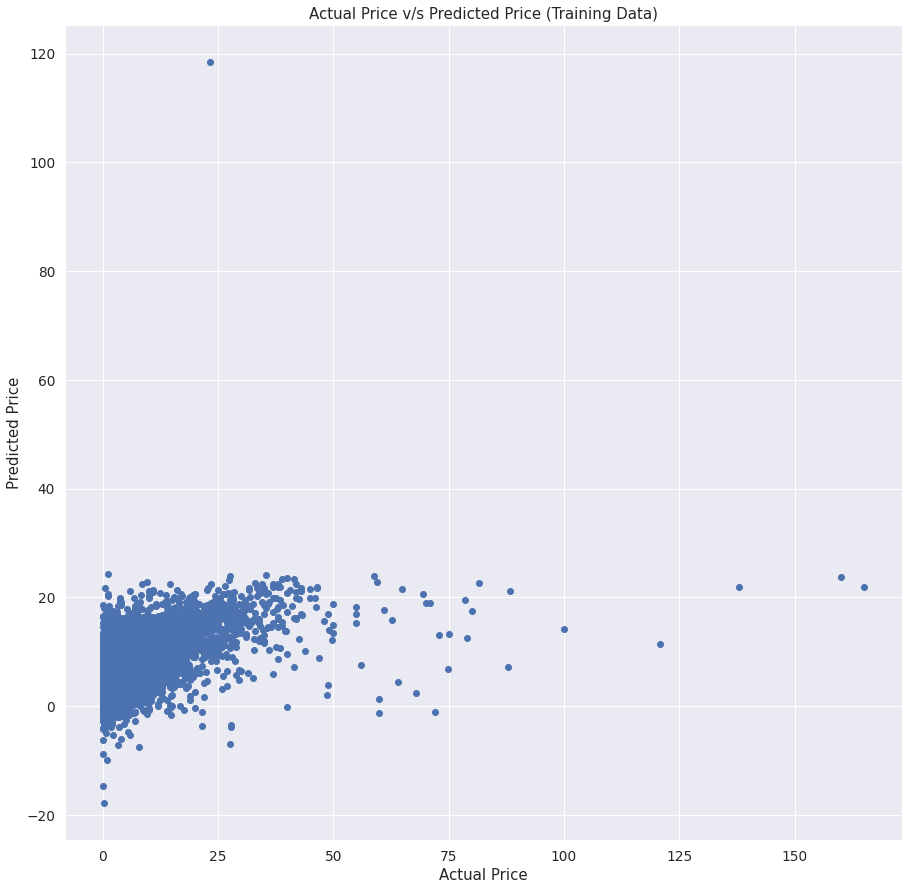

In [45]:
#### Visualizing Actual v/s Predicted PRICEs (Training Data) ####

plt.figure(figsize=(15,15))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Predicted Price (Training Data)")
plt.show()

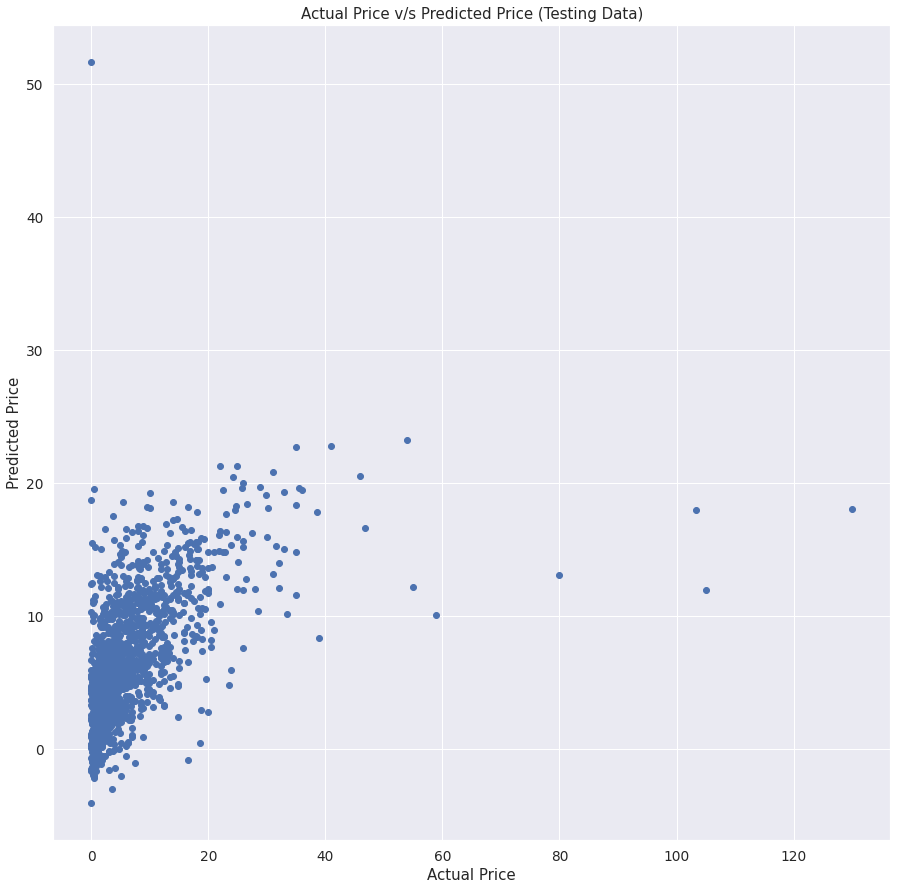

In [46]:
#### Visualizing Actual v/s Predicted PRICEs (Testing Data) ####

plt.figure(figsize=(15,15))
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price v/s Predicted Price (Testing Data)")
plt.show()